#NeoDove Assignment @Bijoyendra Shekhar

#Libraries
* matplotlib.pyplot : for creating and customizing plots in Python.
* pandas is a data manipulation of data frames
* numpy is a numerical computing library for mathematical operations
* seaborn is a data visualization library for statistical graphics.

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Reading excel file containing two sheets 'Call Logs' and 'Leads' and creates two Pandas dataframes 'df_calls' and 'df_leads', respectively. identifing the common columns between the two dataframes using the set intersection function and stores them in the variable common_cols for merging the two dataframes based on their common columns.

Reading Data

In [2]:


# Read the excel file
excel_file = '/content/Data Analyst Assignment.xlsx'
df_calls = pd.read_excel(excel_file, sheet_name='Call Logs')
df_leads = pd.read_excel(excel_file, sheet_name='Leads')

# Find the common columns
common_cols = set(df_calls.columns).intersection(set(df_leads.columns))


{'contact_name', 'lead_tag', 'creation_date', 'contact_number', 'lead_stage', 'campaign_name', 'SDR'}


Merging

In [ ]:
# Merge the two dataframes based on the unique mobile number column
df = pd.merge(df_calls, df_leads, on=['campaign_name', 'lead_tag', 'contact_number', 'contact_name', 'creation_date', 'SDR', 'lead_stage'])


Cleaning and Pre-processing

In [72]:
df.isna().sum()

Contact Name                                               0
Contact Number                                             0
Sdr                                                        0
Campaign Name                                              0
Call Not Connected Retries Left                          725
Lead Stage                                                 0
Lead Tag                                                 273
Call Attempt Serial                                        0
Call Connected                                             0
Call Not Connected Reason If Last Call Not Connected     709
If The Lead Closed Then Reason                             0
Call Duration(Sec)                                       870
Total Time In Filling The Form(Sec)                        0
Reassign To Other User                                     0
Copy To Other Campaign                                     0
Dispose Remarks                                          770
Custom Contact Propertie

* There are many null/blank values

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1218
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Contact Name                                          1219 non-null   object        
 1   Contact Number                                        1219 non-null   float64       
 2   Sdr                                                   1219 non-null   object        
 3   Campaign Name                                         1219 non-null   object        
 4   Call Not Connected Retries Left                       494 non-null    float64       
 5   Lead Stage                                            1219 non-null   object        
 6   Lead Tag                                              946 non-null    object        
 7   Call Attempt Serial                                   1219 non-null   float64 

* There are 35 columns and 1219 rows in merged data frame.

In [ ]:
df.drop_duplicates()
df.dropna()

Feature Engineering

In [4]:
# Convert date and time column to datetime
df['creation_date'] = pd.to_datetime(df['creation_date'])

# Extract date and time components
df['Creation Date'] = df['creation_date'].dt.date
df['Creation Time'] = df['creation_date'].dt.time

# drop the original datetime column
df.drop('creation_date', axis=1, inplace=True)

In [5]:
# Convert date and time column to datetime
df['call_time'] = pd.to_datetime(df['call_time'])

# Extract date and time components
df['Call Date'] = df['call_time'].dt.date
df['Call Time'] = df['call_time'].dt.time

# drop the original datetime column
df.drop('call_time', axis=1, inplace=True)

In [6]:
# Convert date and time column to datetime
df['next_follow_up_date'] = pd.to_datetime(df['next_follow_up_date'])

# Extract date and time components
df['Next Follow Up Date'] = df['next_follow_up_date'].dt.date
df['Next Follow Up Time'] = df['next_follow_up_date'].dt.time

# drop the original datetime column
df.drop('next_follow_up_date', axis=1, inplace=True)

In [7]:
# Convert date and time column to datetime
df['last_call_date'] = pd.to_datetime(df['last_call_date'])

# Extract date and time components
df['Last Call Date'] = df['last_call_date'].dt.date
df['Last Call Time'] = df['last_call_date'].dt.time

# drop the original datetime column
df.drop('last_call_date', axis=1, inplace=True)

In [8]:
# Convert date and time column to datetime
df['Next_followup_date'] = pd.to_datetime(df['next_followup_date'])

# Extract date and time components
df['Next Followup Date'] = df['next_followup_date'].dt.date
df['Next Followup Time'] = df['next_followup_date'].dt.time

# drop the original datetime column
df.drop('Next_followup_date', axis=1, inplace=True)

Renaming

In [9]:
#Renaming Columns by removing Underscore and Capitalizing Starting alphabet 

df = df.rename(columns=lambda x: x.replace('_', ' ').title())


In [10]:
#Saving Merged file to CSV format
df.to_csv("neodove.csv")

Outliers Study and Visualization

Histogram shows the distribution of values across the different columns in the dataframe. This can be useful for visualizing patterns and identifying potential outliers or anomalies in the data.

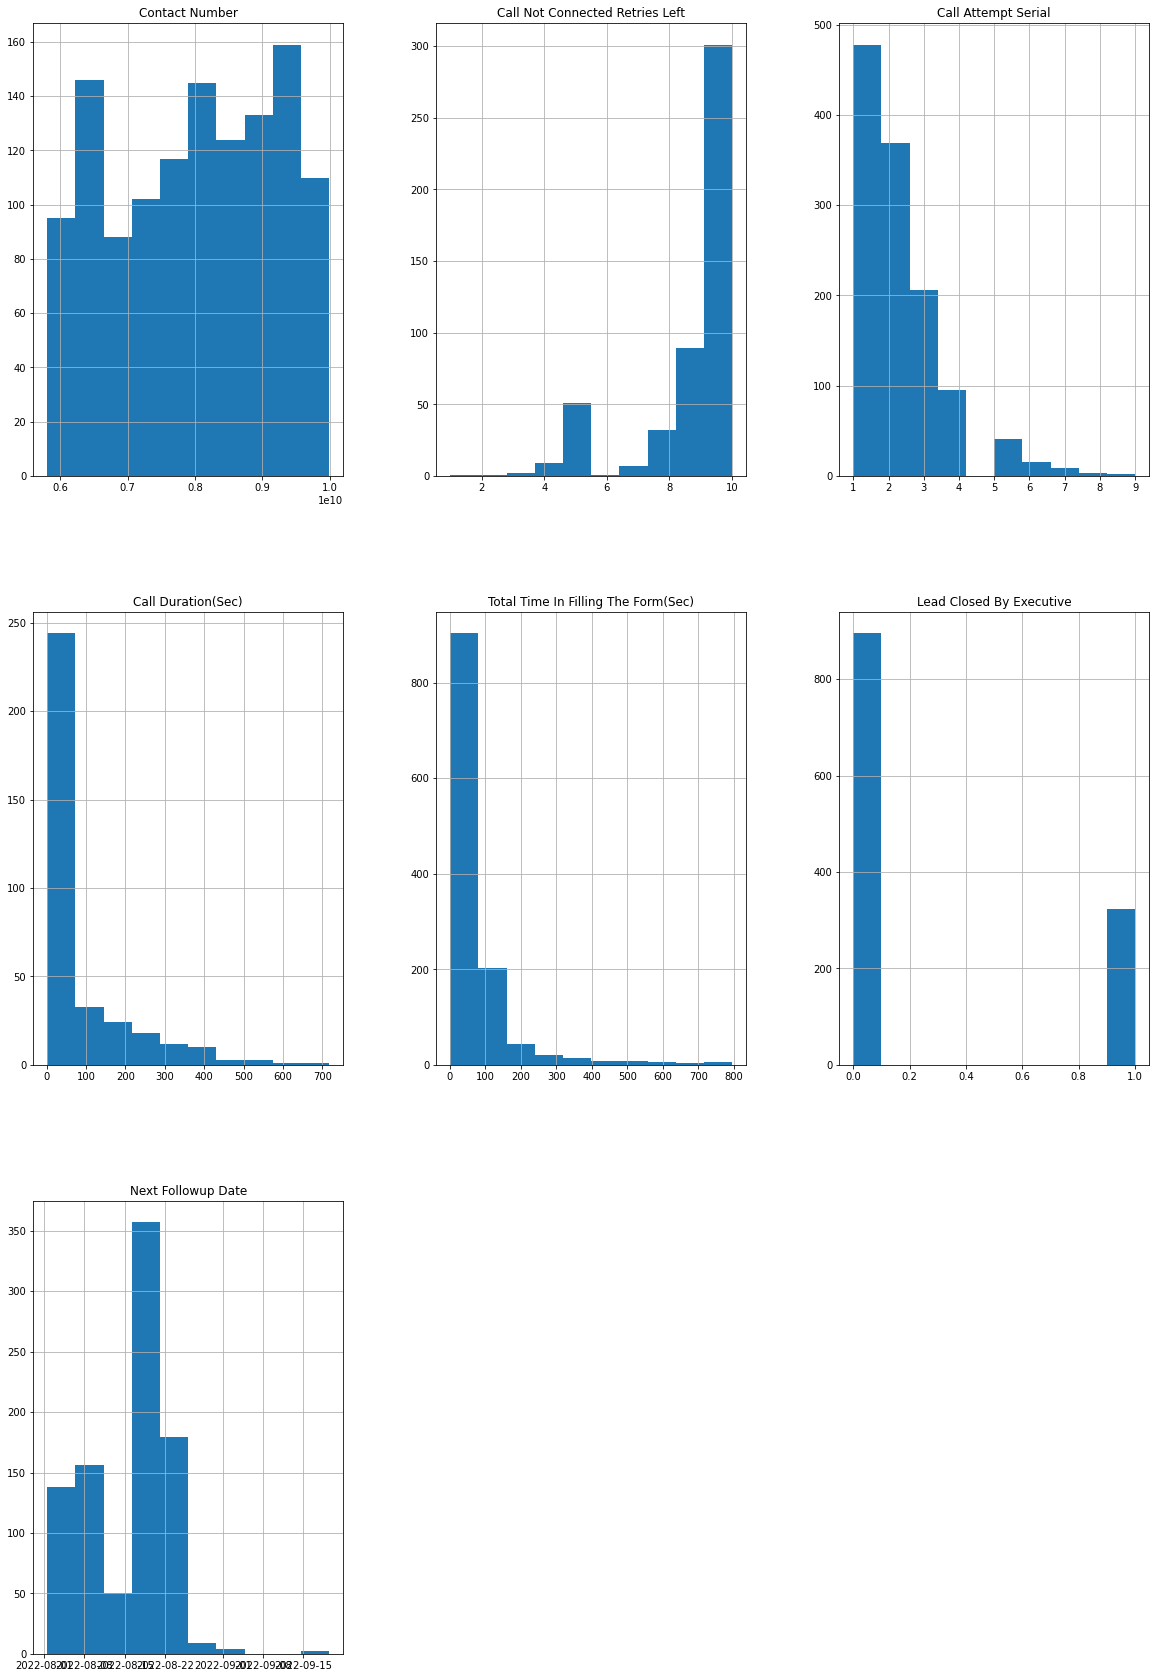

In [66]:
df.hist(figsize=(20,30));

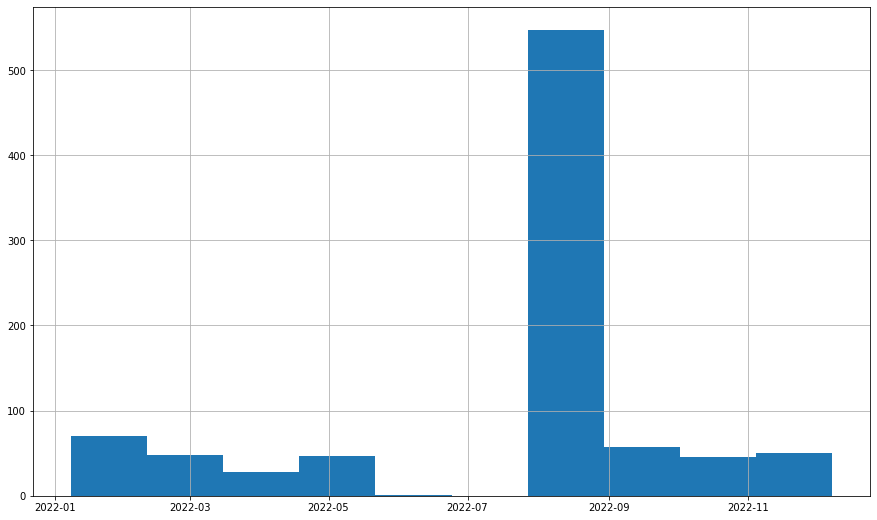

In [71]:
df['Next Follow Up Date'].hist(figsize=(15,9));

Observations
* Many short Durations calls about 240 ( Right Skew)
* About 300 call with 10 retries left. ( Left Skew)
* Many Forms were filled in shorter durations, wheras few took longer durations. ( Right Skew)
* More than 850 leads are closed by executive, wheras about 370 are still open.
* Most followed up dates are on 9th August.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


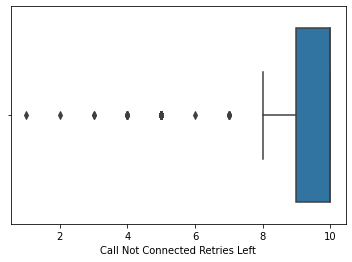

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


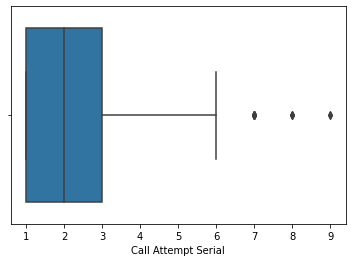

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


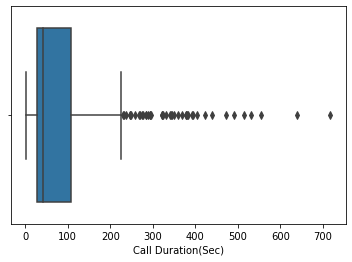

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


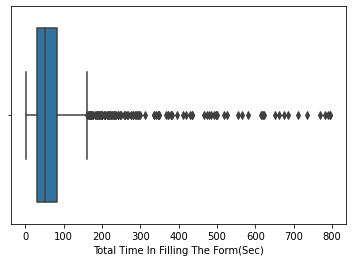

In [68]:
cols = ['Call Not Connected Retries Left','Call Attempt Serial', 'Call Duration(Sec)', 
        'Total Time In Filling The Form(Sec)']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

Observations
* Most Calls have 9-10 enteries left, very few have 1-7 enteries left
* Range of call attemps serial number is 1 to 3 with median of 2. Some are between 3 to 6 and very few are from 7 to 9 and are outliers.
* Median of call duration is about 25 seconds. 75% of call duration lies between approximately 20 to 90 seconds. Few are outliers having more that 600-700 seconds of call duration.
* Median of filling form duration is about 40 seconds. 75% of call duration lies between approximately 20 to 90 seconds. Few are outliers having more that 700 to 800 seconds of call duration.

#Correlation Heat Map

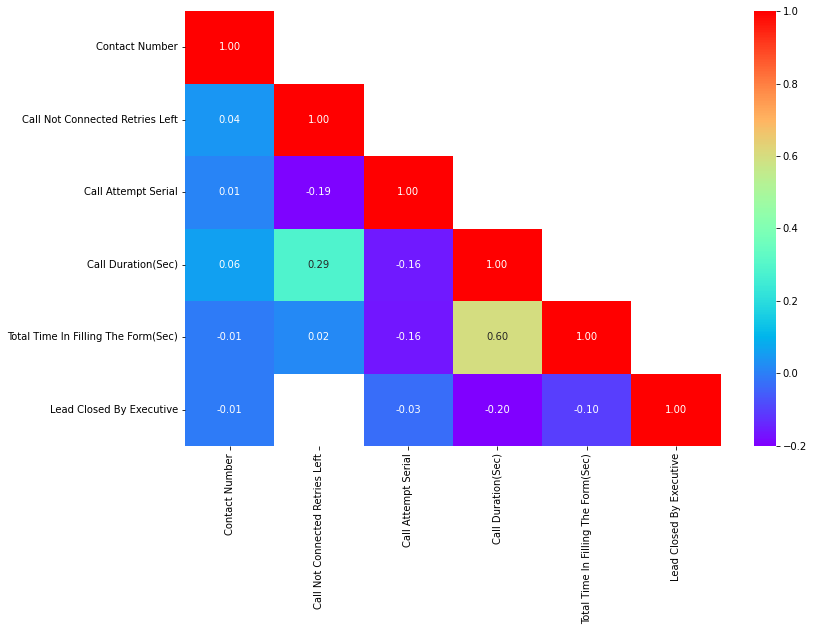

In [69]:
# subset dataframe to only numerical columns
num_data = df.select_dtypes(include=np.number)

# create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(num_data.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(num_data.corr(),+1))
plt.show()

Observation

Not much co-relations observed between variables
* Call Duration has positive co-relation between total time of filling the form. Forms with longer duration shall be taking longer  time to fill the forms.
* Shorter Duration calls are having negative co-relations. Calls which are of short durations are not closed by executive, might be they are send for further follow up or retries.


# EDA

# Univariate Analysis

In [14]:
# Simple Statistics
print("Shape of dataframe: ", df.shape)
print("Number of unique contact names: ", df['Contact Name'].nunique())
print("Number of unique SDRs: ", df['Sdr'].nunique())
print("Number of unique campaign names: ", df['Campaign Name'].nunique())
print("Unique lead stages: ", df['Lead Stage'].unique())
print("Unique lead tags: ", df['Lead Tag'].unique())
print("Unique Reasons if call not connected: ", df['Call Not Connected Reason If Last Call Not Connected'].unique())
print("Number of unique lead statuses: ", df['Lead Status'].nunique())
print("Total time spent in calls in hours: ", df['Call Duration(Sec)'].sum()/3600)
print("Total time spent in filling the form in hours: ", df['Total Time In Filling The Form(Sec)'].sum()/3600)
# Count number of leads closed by executive
df['Lead Closed By Executive'] = df['Lead Closed By Executive'].replace({'Yes': 1, 'No': 0})
print("Number of leads closed by executive: ", df['Lead Closed By Executive'].sum())
print("Number of leads with next follow up date: ", df['Next Followup Date'].notnull().sum())

Shape of dataframe:  (1219, 35)
Number of unique contact names:  756
Number of unique SDRs:  3
Number of unique campaign names:  1
Unique lead stages:  ['LOST' 'Discovery pending' 'Demo scheduled' 'Discovery done' 'Demo done']
Unique lead tags:  ['not-interested' nan 'junk' 'call attempted' 'require job' 'hot'
 'call rescheduled' 'require after sometime' 'sent details on whatsapp'
 'call not connected network issue' 'require telecaller' 'warm'
 'lost-to-competition' 'require only ivr' 'demo rescheduled' 'deal won'
 'already-purchased']
Unique Reasons if call not connected:  [nan 'NUMBER_NOT_IN_USE' 'NOT_PICKED' 'USER_DISCONNECTED' 'SWITCH_OFF'
 'INCOMING_CALLS_NOT_AVAILABLE' 'BUSY' 'NETWORK_ISSUE'
 'CALL_NOT_CONNECTED' 'INVALID_NUMBER' 'other(Invalid number.)']
Number of unique lead statuses:  4
Total time spent in calls in hours:  9.106388888888889
Total time spent in filling the form in hours:  27.14361111111111
Number of leads closed by executive:  324
Number of leads with next foll

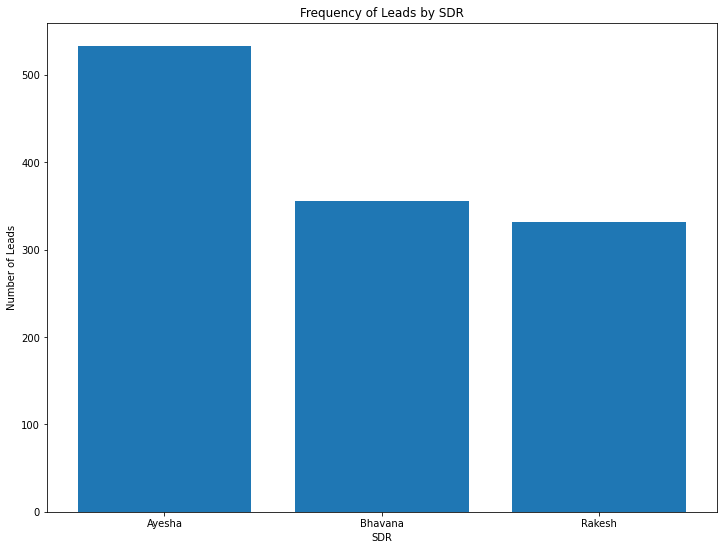

In [15]:

plt.figure(figsize=(12, 9))
# Count the number of leads for each SDR
sdr_counts = df['Sdr'].value_counts()

# Create a bar chart
plt.bar(sdr_counts.index, sdr_counts.values)

# Set chart title and labels
plt.title('Frequency of Leads by SDR')
plt.xlabel('SDR')
plt.ylabel('Number of Leads')

# Display the chart
plt.show()


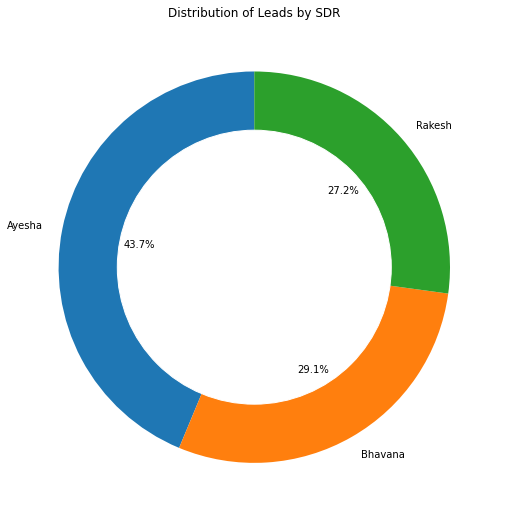

In [16]:

plt.figure(figsize=(12, 9))
# Count the number of leads handled by each SDR
sdrs = df['Sdr'].value_counts()

# Create a donut chart with percentages
plt.pie(sdrs.values, labels=sdrs.index, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Set chart title
plt.title('Distribution of Leads by SDR')

# Display the chart
plt.show()


Observations
* Most number of Leads are generated by Ayesha (43.7%)
* Least number of Leads are generated by Rakesh (27.2%)


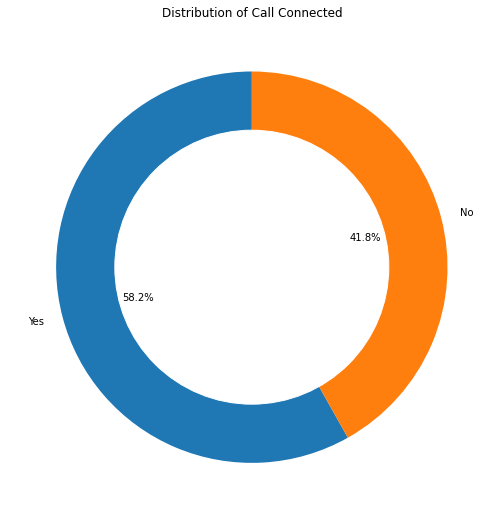

In [43]:

plt.figure(figsize=(12, 9))
# Count the number of  Call Connected
sdrs = df['Call Connected'].value_counts()

# Create a donut chart with percentages
plt.pie(sdrs.values, labels=sdrs.index, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Set chart title
plt.title('Distribution of Call Connected')

# Display the chart
plt.show()

Observations
* More than 50% of the calls were not connected.

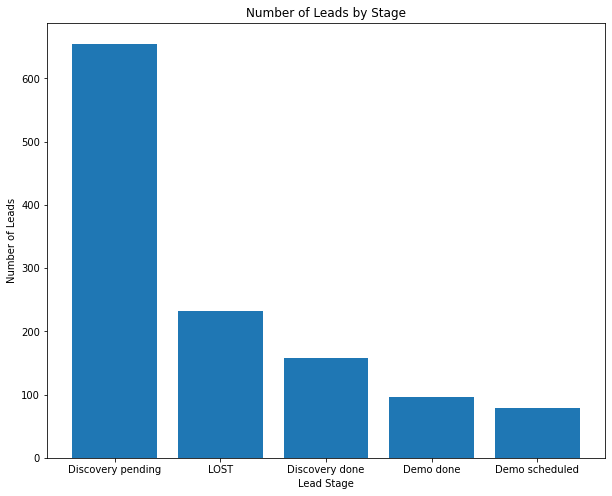

In [17]:

plt.figure(figsize=(10, 8))
# Count the number of leads in each stage
lead_stages = df['Lead Stage'].value_counts()

# Create a bar chart
plt.bar(lead_stages.index, lead_stages.values)

# Set chart title and axis labels
plt.title('Number of Leads by Stage')
plt.xlabel('Lead Stage')
plt.ylabel('Number of Leads')

# Display the chart
plt.show()


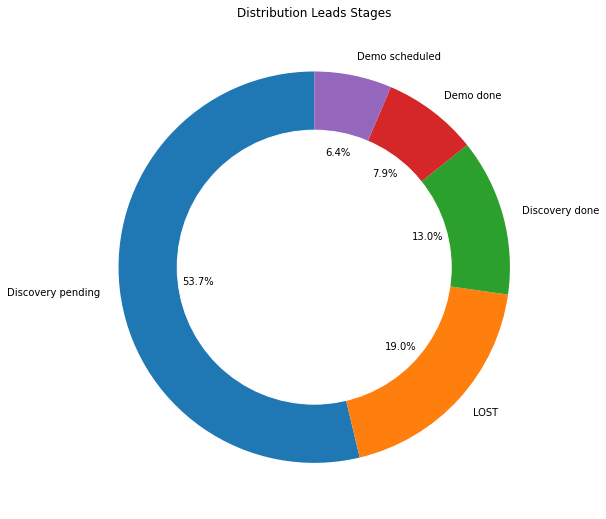

In [18]:

plt.figure(figsize=(12, 9))
# Count the number of leads handled by each SDR
sdrs = df['Lead Stage'].value_counts()

# Create a donut chart with percentages
plt.pie(sdrs.values, labels=sdrs.index, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Set chart title
plt.title('Distribution Leads Stages')

# Display the chart
plt.show()

Observations
* More than 600 leads discovery is still pending (53.7%)
* More than 200 Leads have been lost (19%). 
* About for 150 Discovery has been done (13%).
* For approximately 110 (7.9%) leads Demo is completed and also Demo is schedulled for approximately 100 leads (6.4%).

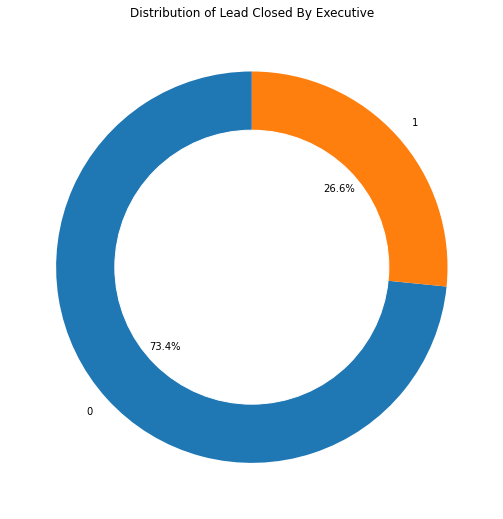

In [45]:

plt.figure(figsize=(12, 9))
# Counting the Lead Closed By Executive
sdrs = df['Lead Closed By Executive'].value_counts()

# Create a donut chart with percentages
plt.pie(sdrs.values, labels=sdrs.index, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Set chart title
plt.title('Distribution of Lead Closed By Executive')

# Display the chart
plt.show()

Observations
* About 73% of leads have been closed by executive.
* Only about 26% of leads are still open.

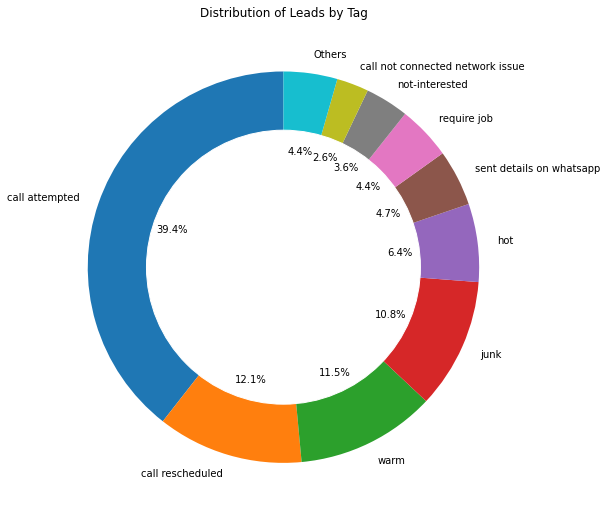

In [28]:

# Converting 'Lead Tag' to a pandas Series
lead_tags = df['Lead Tag'].value_counts()

# Threshold for smaller quantities to be merged to 'Others'
threshold = 20

# Extract the values and labels for larger quantities
larger_values = lead_tags[lead_tags >= threshold].values
larger_labels = lead_tags[lead_tags >= threshold].index

# Extract the sum of smaller quantities and set 'Others' as the label
smaller_sum = lead_tags[lead_tags < threshold].sum()
smaller_labels = ['Others']

# Combine the values and labels for the larger and smaller quantities
combined_values = list(larger_values) + [smaller_sum]
combined_labels = list(larger_labels) + smaller_labels

# Create a donut chart with percentages
plt.figure(figsize=(12, 9))
plt.pie(combined_values, labels=combined_labels, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Set chart title
plt.title('Distribution of Leads by Tag')

# Display the chart
plt.show()

Observations
* 39.4% of leads by tags were  re-attempted
* About 12% calls were rescheduled
* Whereas tags - warm ( 11.5%),Junk (10.8%) and hot (6.4%) were observed
* 4.7% were send details on wats app.
* 4.4% require jobs
* Whereas some have other issues like not interested, network issue etc.

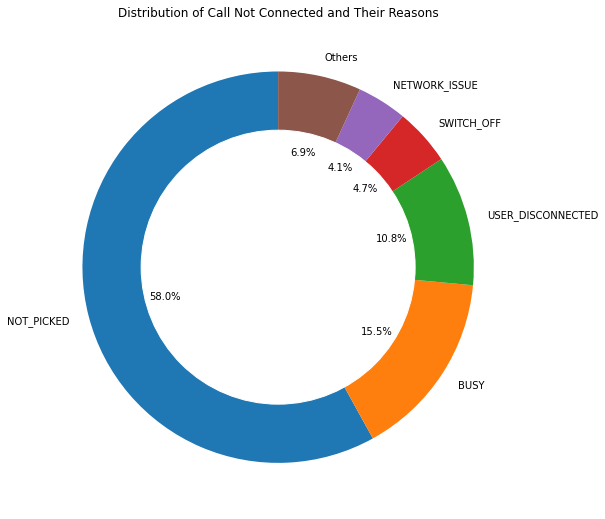

In [31]:

# Converting 'Call Not Connected Reason (cncreason) ' to a pandas Series
cncreason = df['Call Not Connected Reason If Last Call Not Connected'].value_counts()

# Threshold for smaller quantities to be merged to 'Others'
threshold = 20

# Extract the values and labels for larger quantities
larger_values = cncreason[cncreason >= threshold].values
larger_labels = cncreason[cncreason >= threshold].index

# Extract the sum of smaller quantities and set 'Others' as the label
smaller_sum = cncreason[cncreason < threshold].sum()
smaller_labels = ['Others']

# Combine the values and labels for the larger and smaller quantities
combined_values = list(larger_values) + [smaller_sum]
combined_labels = list(larger_labels) + smaller_labels

# Create a donut chart with percentages
plt.figure(figsize=(12, 9))
plt.pie(combined_values, labels=combined_labels, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Set chart title
plt.title('Distribution of Call Not Connected and Their Reasons')

# Display the chart
plt.show()

Observations ( Call Not Connected)
* 58% not picked the call
* 15.5% were busy.
* 10.8% were disconnected
* Also some others reasons, network issue, switch off etc

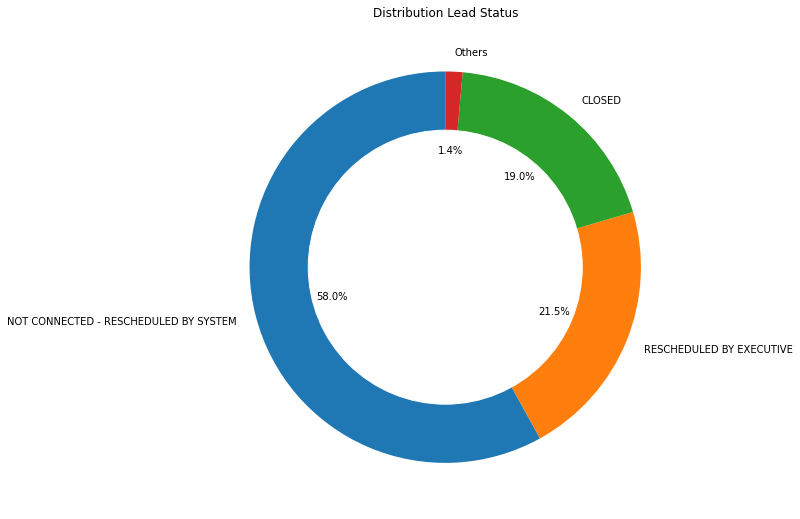

In [42]:

# Converting 'Lead Status (LS)' to a pandas Series
LS = df['Lead Status'].value_counts()

# Threshold for smaller quantities to be merged to 'Others'
threshold = 20

# Extract the values and labels for larger quantities
larger_values = LS[LS >= threshold].values
larger_labels = LS[LS >= threshold].index

# Extract the sum of smaller quantities and set 'Others' as the label
smaller_sum = LS[LS < threshold].sum()
smaller_labels = ['Others']

# Combine the values and labels for the larger and smaller quantities
combined_values = list(larger_values) + [smaller_sum]
combined_labels = list(larger_labels) + smaller_labels

# Create a donut chart with percentages
plt.figure(figsize=(12, 9))
plt.pie(combined_values, labels=combined_labels, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Set chart title
plt.title('Distribution Lead Status')

# Display the chart
plt.show()

Observatons( Lead Status)
* 58% are rescheduled by system as were not connected.
* 21.5% were rescheduled by executive.
* 19%  of leads status are closed.
* 1.4% leads have other lead status then above.

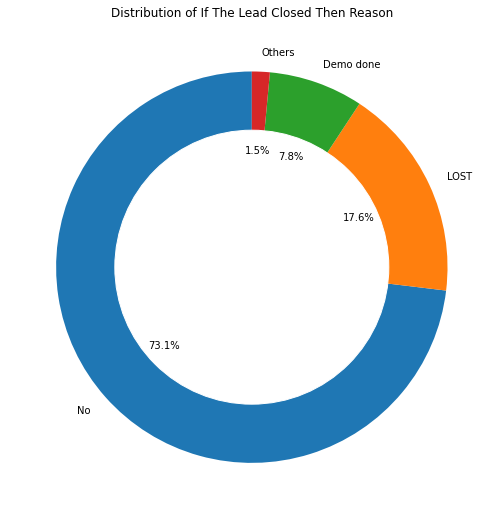

In [33]:

# Converting 'If The Lead Closed Then Reason (lcreason)' to a pandas Series
lcreason = df['If The Lead Closed Then Reason'].value_counts()

# Threshold for smaller quantities to be merged to 'Others'
threshold = 20

# Extract the values and labels for larger quantities
larger_values = lcreason[lcreason >= threshold].values
larger_labels = lcreason[lcreason >= threshold].index

# Extract the sum of smaller quantities and set 'Others' as the label
smaller_sum = lcreason[lcreason < threshold].sum()
smaller_labels = ['Others']

# Combine the values and labels for the larger and smaller quantities
combined_values = list(larger_values) + [smaller_sum]
combined_labels = list(larger_labels) + smaller_labels

# Create a donut chart with percentages
plt.figure(figsize=(12, 9))
plt.pie(combined_values, labels=combined_labels, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Set chart title
plt.title('Distribution of If The Lead Closed Then Reason')

# Display the chart
plt.show()

Observations ( Lead closed Reason)
* About 73% of leads said no
* 17.6% of leads were lost
* 7.8% didn't purchased the product even aftergetting demo.
* 1.5% have other reasons of not buying the product.

# Bi-variate Analysis

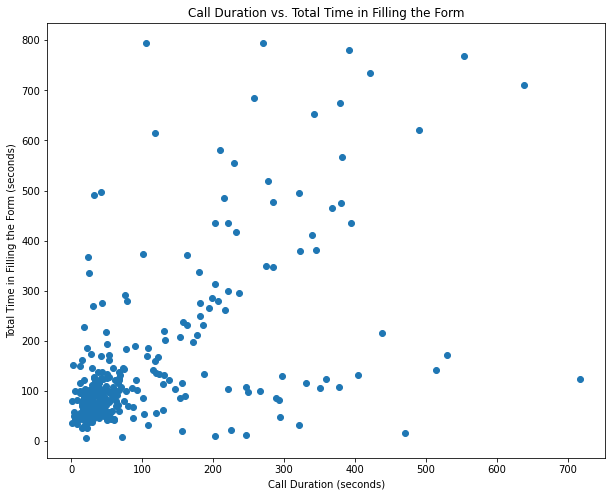

In [30]:

plt.figure(figsize=(10, 8))
# Create a scatter plot of call duration vs. total time in filling the form
plt.scatter(df['Call Duration(Sec)'], df['Total Time In Filling The Form(Sec)'])

# Set chart title and axis labels
plt.title('Call Duration vs. Total Time in Filling the Form')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Total Time in Filling the Form (seconds)')

# Display the chart
plt.show()


Observations
* Many calls with short durations and form fill up time
* Few are outliers

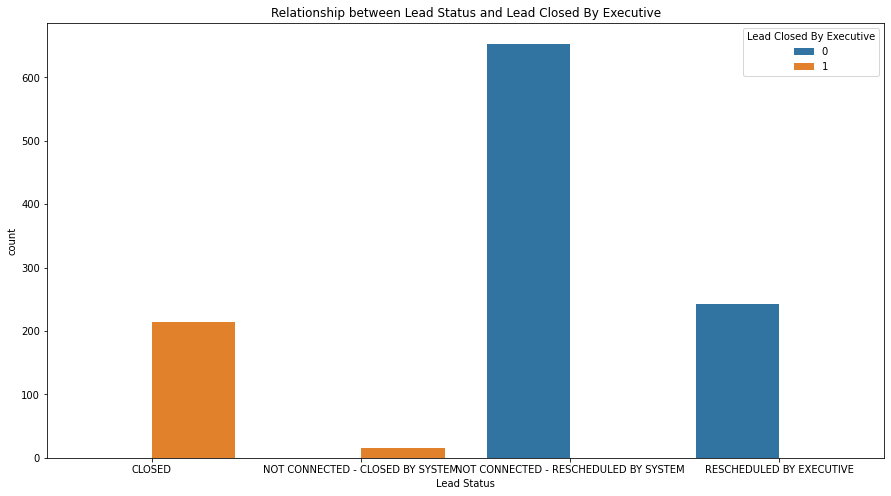

In [55]:
plt.figure(figsize=(15, 8))  # set the figure size
sns.countplot(x='Lead Status', hue='Lead Closed By Executive', data=df)
plt.title('Relationship between Lead Status and Lead Closed By Executive')
plt.show()


Observations
* Lead closed by system and marked as closed by SDR is closed by ececutive.
* Many calls are still not connected

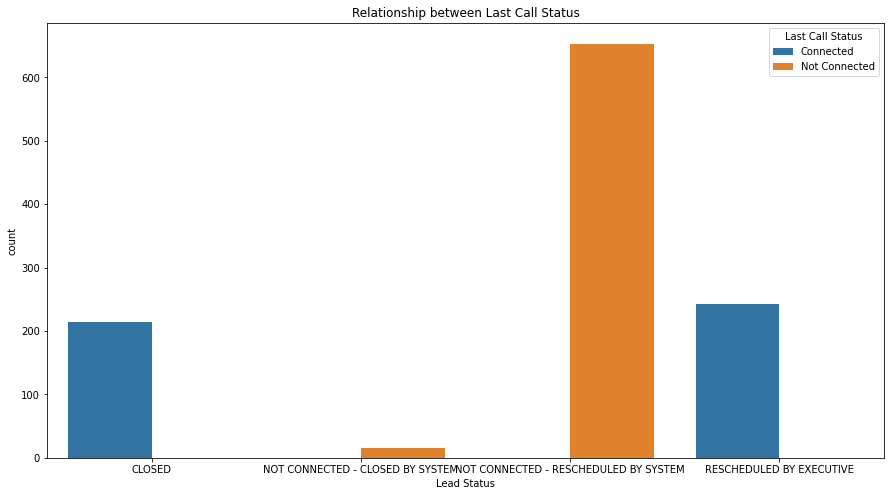

In [56]:
plt.figure(figsize=(15, 8))  # set the figure size
sns.countplot(x='Lead Status', hue='Last Call Status', data=df)
plt.title('Relationship between Last Call Status')
plt.show()

Observations
* Leads rescheduled by system are still not connected.
* leads closed by system are bot connected.
* leads connected are either closed or rescheduled by executive.

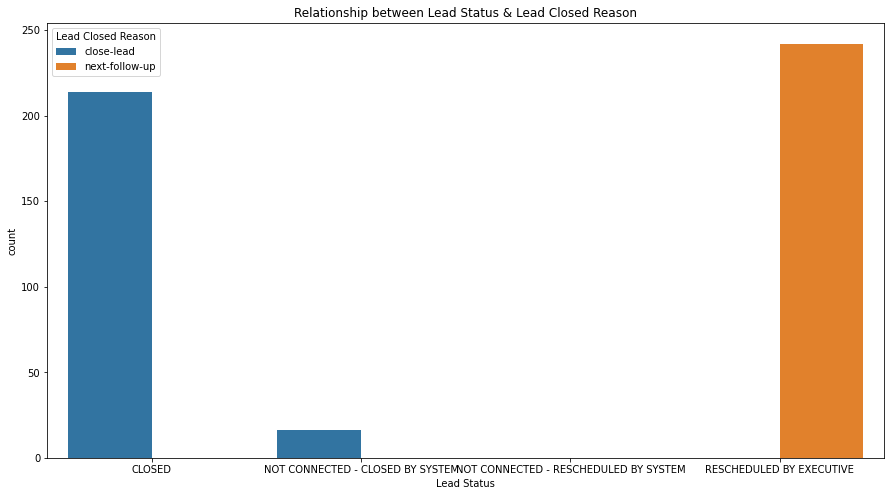

In [61]:
plt.figure(figsize=(15, 8))  # set the figure size
sns.countplot(x='Lead Status', hue='Lead Closed Reason', data=df)
plt.title('Relationship between Lead Status & Lead Closed Reason')
plt.show()

Observations
* Either leads are closed
* Or sent for next follow-up.

# Conclusion
The lead-call analysis can provide insights into the effectiveness of a company's sales and marketing strategies. By analyzing the correlation between the number of calls made to leads and the status of those leads, a company can gain a better understanding of which leads are more likely to convert into customers. For example, if the analysis shows that leads that have been called more frequently are more likely to convert, then the company may want to increase the number of calls made to those leads. Additionally, if the analysis shows that certain lead sources are more likely to convert, then the company may want to focus its marketing efforts on those sources. 